In [1]:
from scipy.stats import norm
import autograd.numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import time as time
%matplotlib inline

from confint import confint

## data generation

In [2]:
np.random.seed(1)
n = 100
X = np.random.randn(n)
X = np.sort(X)

## experiment setting parameters

In [3]:
alpha = 0.1 # confidence level 1 - alpha
thread_num = 4 # number of threads

## algorithm parameters

In [4]:
opt_pts_ratio = 1.0
kappa = 8.0
M = 12.0
tau_max = 1e5
max_iters = 50
min_iters = 15

## solve

In [5]:
conf_int = confint(X, alpha, opt_pts_ratio=opt_pts_ratio)
t0 = time.time()
conf_int.compute_pw_conf_ints(thread_num=thread_num, M=M, tau_max=tau_max, kappa=kappa, 
                              max_iters=max_iters, min_iters=min_iters, verbose=False)
t1 = time.time()
print("time cost =", t1 - t0)

num design points to optimize 13


/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/reductions/solvers/solving_chain.py:167: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)
/Users/xinyueshen/anaconda3/lib/python3.7/site-packages/cvxpy/

time cost = 6.8909912109375


## plot result

Text(0, 0.5, 'log density')

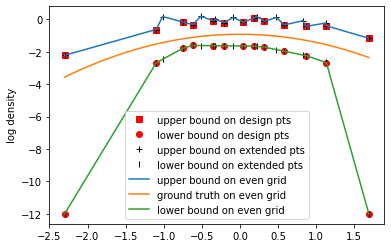

In [6]:
opt_pts = conf_int.opt_pts
plt.plot(opt_pts, np.log(conf_int.high_opt_pts), ' s', color='r', label="upper bound on design pts")
plt.plot(opt_pts, np.log(conf_int.low_opt_pts), ' o', color='r', label="lower bound on design pts")

extended_x = conf_int.opt_int_pts
plt.plot(extended_x, np.log(conf_int.high_opt_int_pts), ' +', color='k', label="upper bound on extended pts")
plt.plot(extended_x, np.log(conf_int.low_opt_int_pts), ' |', color='k', label="lower bound on extended pts")

x_grid = np.linspace(np.min(opt_pts), np.max(opt_pts), num=10000, endpoint=True)
f_grid = norm.pdf(x_grid)
l_log_ext_func = interp1d(extended_x, np.log(conf_int.low_opt_int_pts))
h_log_ext_func = interp1d(extended_x, np.log(conf_int.high_opt_int_pts))

plt.plot(x_grid, h_log_ext_func(x_grid), label="upper bound on even grid")
plt.plot(x_grid, np.log(f_grid), label="ground truth on even grid")
plt.plot(x_grid, l_log_ext_func(x_grid), label="lower bound on even grid")

plt.legend()
plt.ylabel("log density")